In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:\\Users\\saipr\\Downloads\\spam (1).csv",encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [8]:
df=df[['v1','v2']]

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


<Axes: xlabel='v1', ylabel='count'>

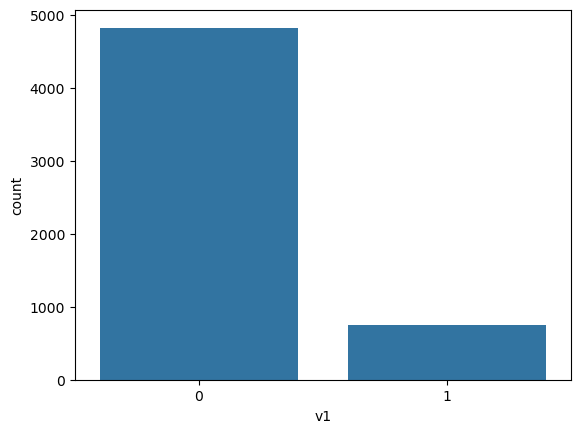

In [14]:
sns.countplot(x=df['v1'])

In [15]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
X=df['v2']
y=df['v1']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)


In [19]:
len(tokenizer.word_index)+1

7466

In [20]:
voc_size=7466

In [21]:
# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [22]:
import numpy as np
essay_lengths = [len(essay) for essay in X_train]
print(f"Max Length: {max(essay_lengths)}")
print(f"Min Length: {min(essay_lengths)}")
print(f"Average Length: {np.mean(essay_lengths)}")


Max Length: 189
Min Length: 0
Average Length: 15.866923076923078


In [24]:
max_length = 50 # Set max length (adjust based on your data)
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')


In [25]:
from tensorflow.keras.layers import Embedding,LSTM,GRU,SimpleRNN,Embedding,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model=Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=128, input_length=600))
model.add(LSTM(84, activation='tanh', kernel_regularizer=l2(0.005), return_sequences=True))
model.add(LSTM(64,activation='tanh',kernel_regularizer=l2(0.005)))
model.add(Dense(6, activation='softmax'))  # Output layer with 1 neuron and sigmoid activation


c:\Users\saipr\anaconda3\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=3,              # Number of epochs with no improvement after which training will stop
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored metric
)


In [28]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8430 - loss: 1.5452 - val_accuracy: 0.8684 - val_loss: 0.5334
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8625 - loss: 0.5024 - val_accuracy: 0.8684 - val_loss: 0.4096
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8531 - loss: 0.4347 - val_accuracy: 0.8989 - val_loss: 0.4201
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9168 - loss: 0.3396 - val_accuracy: 0.9671 - val_loss: 0.1950
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9804 - loss: 0.1364 - val_accuracy: 0.9779 - val_loss: 0.1315
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9882 - loss: 0.0891 - val_accuracy: 0.9785 - val_loss: 0.1169
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9161 - loss: 0.3179 - val_accuracy: 0.8684 - val_loss: 0.4311
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8766 - loss: 0.4133 - val_accu

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9814 - loss: 0.1061
Test Loss: 0.11691754311323166
Test Accuracy: 0.9784688949584961


In [55]:
# Save the trained model
model.save('model.h5')

# Save the tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


In [58]:
from tensorflow.keras.models import load_model
import pickle

# Function to load the model and tokenizer
def load_model_and_tokenizer(model_path='model.h5', tokenizer_path='tokenizer.pkl'):
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as f:
        tokenizer = pickle.load(f)
    return model, tokenizer


In [61]:
# Function to make predictions and classify as "spam" or "ham"
def predict_text(model, tokenizer, sample_texts, maxlen=50):
    # Preprocess the input text (tokenize and pad sequences)
    X_predict = tokenizer.texts_to_sequences(sample_texts)
    X_predict = pad_sequences(X_predict, maxlen=maxlen, padding='post')

    # Make predictions using the trained model
    predictions = model.predict(X_predict)

    # Process predictions to classify as 'spam' or 'ham'
    results = []
    for text, pred in zip(sample_texts, predictions):
        label = "spam" if pred[0] > 0.5 else "ham"  # Threshold of 0.5 for binary classification
        results.append({
            "Text": text,
            "Predicted Label": label,
            "Prediction Confidence": f"{pred[0]:.4f}"
        })
    return results

# Example usage
sample_texts = [
    "Congrats! You have won a free ticket to the concert!",
    "Hey, let's grab coffee tomorrow. What time works for you?",
    "You have an important meeting with the CEO tomorrow!",
    "Hey, just checking in. How are you doing?"
]

# Load the saved model and tokenizer
model, tokenizer = load_model_and_tokenizer()

# Predict on sample texts
predictions = predict_text(model, tokenizer, sample_texts)

# Print prediction results
for result in predictions:
    print(f"Text: {result['Text']}")
    print(f"Predicted Label: {result['Predicted Label']}")
    print(f"Prediction Confidence: {result['Prediction Confidence']}\n")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Text: Congrats! You have won a free ticket to the concert!
Predicted Label: ham
Prediction Confidence: 0.0243

Text: Hey, let's grab coffee tomorrow. What time works for you?
Predicted Label: spam
Prediction Confidence: 0.9839

Text: You have an important meeting with the CEO tomorrow!
Predicted Label: spam
Prediction Confidence: 0.9839

Text: Hey, just checking in. How are you doing?
Predicted Label: spam
Prediction Confidence: 0.9839



In [79]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test is already in binary format (0 or 1)
# If y_test is already binary (0 or 1), skip np.argmax

# Get predictions from the model (output will likely be probabilities)
y_pred = model.predict(X_test)



53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [80]:
# Convert the predicted probabilities to binary labels (0 or 1)
y_pred_labels = np.argmax(y_pred, axis=1)
  # This assumes a binary classification



In [77]:
y_pred_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_test

4014    1
1697    0
2374    0
2529    0
2794    0
       ..
991     0
224     1
1233    0
1366    0
2627    0
Name: v1, Length: 1672, dtype: int32

In [81]:
# Compute the confusion matrix using the binary labels
cm = confusion_matrix(y_test, y_pred_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1441   11]
 [  25  195]]


In [82]:
# Check TensorFlow version
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Check scikit-learn version
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")

# Check pandas version
import pandas as pd
print(f"Pandas version: {pd.__version__}")

# Check NumPy version
import numpy as np
print(f"NumPy version: {np.__version__}")

# Check Matplotlib version
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

# Check Seaborn version
import seaborn as sns
print(f"Seaborn version: {sns.__version__}")

# Check Streamlit version
import streamlit as st
print(f"Streamlit version: {st.__version__}")


TensorFlow version: 2.17.0
scikit-learn version: 1.5.1
Pandas version: 2.1.4
NumPy version: 1.23.5
Matplotlib version: 3.7.0
Seaborn version: 0.13.2
Streamlit version: 1.37.1
